In [1]:
import sys 
sys.path.append('../')
import os
from environment.deephive_utils import *
from environment.utils import *
import numpy as np
from dotenv import load_dotenv
load_dotenv()
import matplotlib.pyplot as plt

c:\Users\eikpon1\envs\RLEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
def run_experiment(env, agent_policy, timesteps, iters, save_gif=False, result_path="experiment/"):
    gbest_values = []
    if save_gif:
        os.makedirs(result_path, exist_ok=True)
    for iter in range(iters):
        print("Iteration: ", iter)
        observation_info = env.reset()
        episode_gbVals = []
        for _ in range(timesteps):
            episode_gbVals.append(env.gbest[-1])
            exploiters_action =  get_action(observation_info, agent_policy, env)
            explorer_action = get_informed_action(env)
            # split the agents into two groups and let one group exploit and the other explore
            actions = np.zeros((env.n_agents, env.n_dim))
            actions[:env.n_agents//2] = exploiters_action[:env.n_agents//2]
            actions[env.n_agents//2:] = explorer_action[env.n_agents//2:]
            observation_info, reward, done, info = env.step(actions)
        gbest_values.append(episode_gbVals)
        if save_gif:
            _ = env.render(type="history", file_path=result_path + "iter_" + str(iter) + ".gif")
    return gbest_values

In [3]:
# #Experiment 1: VARIANCE DRIVEN EXPLORERS AND EXPLOITERS
config_path = '../config/config.json'
model_path = "../models/exploiting_model.pth"
mode = "test"
env1, agent_policy1 = initialize(config_path, mode=mode, model_path=model_path)
config = parse_config(config_path)
#agent_policy1.set_action_std(config["test_action_std"])

#Experiment 2: NO DIVISION
model_path = "../models/policy-50000.pth"
mode = "test"
env2, agent_policy2 = initialize(config_path, mode=mode, model_path=model_path)
config = parse_config(config_path)
agent_policy2.set_action_std(config["test_action_std"])

iters = 10
exp_num = 5
timesteps = 20
experiments = [
    [env1, agent_policy1, f"variance_driven_exploration_{exp_num}", timesteps, iters, True, "experiment/"],
    [env2, agent_policy2, f"no_division_{exp_num}", timesteps, iters, True, "experiment/"]
]

Loaded policy from:  ../models/exploiting_model.pth
Loaded policy from:  ../models/policy-50000.pth


Iteration:  0
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  1
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  2
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  3
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  4
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  5
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
2 agents are stuck - [4, 8] at step 17
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  6
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  7
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  8
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  9
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  0
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  1
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  2
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  3
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  4
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  5
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  6
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  7
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  8
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  9
(15, 2)
(20, 2)
(25, 2)
(30, 2)
(35, 2)
(40, 2)
(45, 2)
(50, 2)
(55, 2)
(60, 2)
(65, 2)
(70, 2)
(75, 2)
(80, 2)
(85, 2)
(90, 2)
(95, 2)
(100, 2)
(105, 2)
(110, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


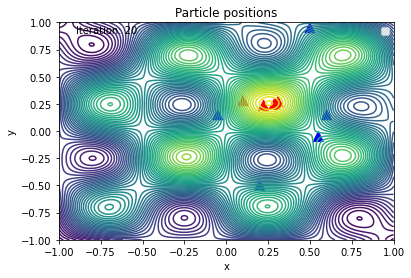

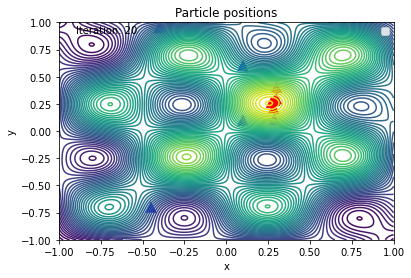

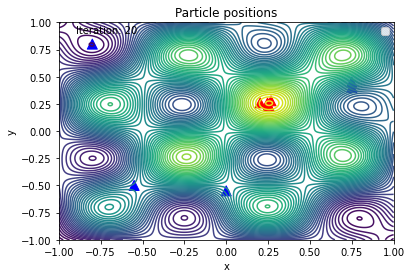

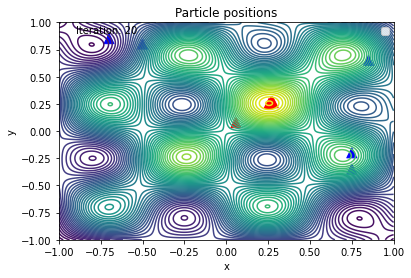

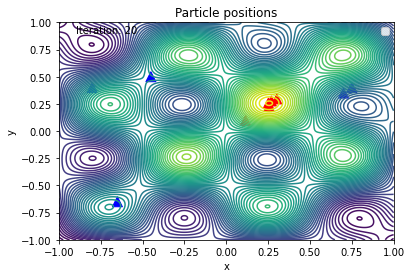

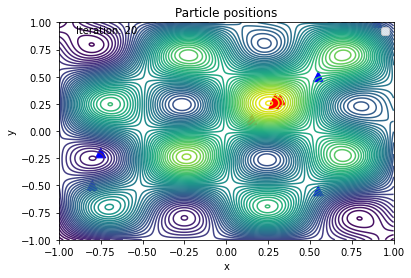

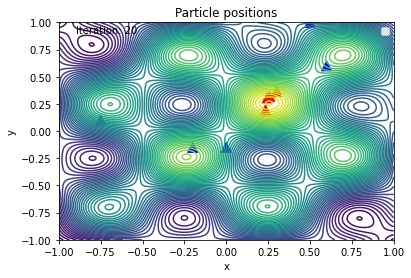

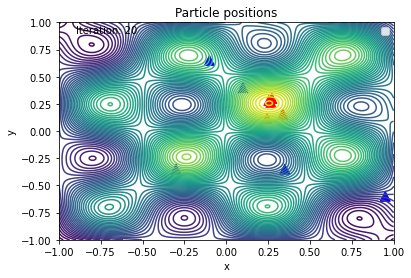

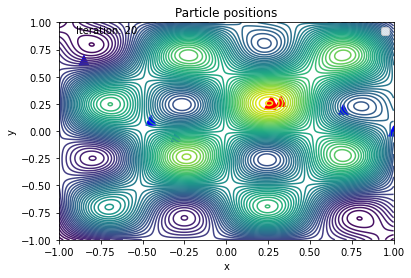

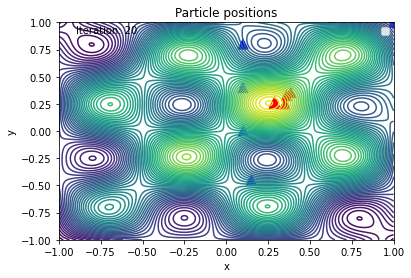

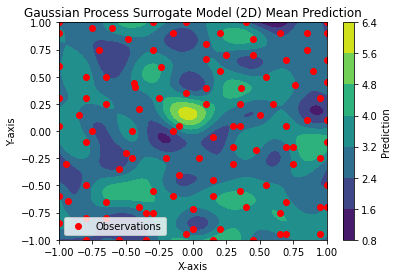

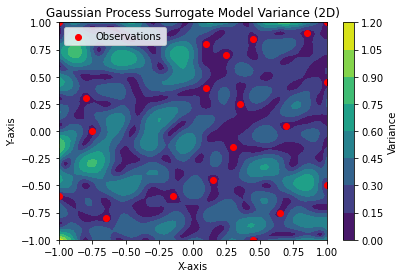

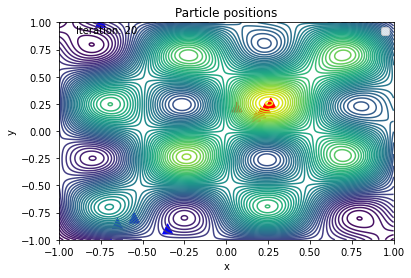

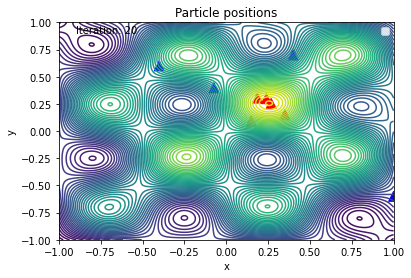

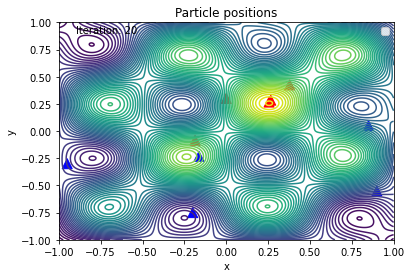

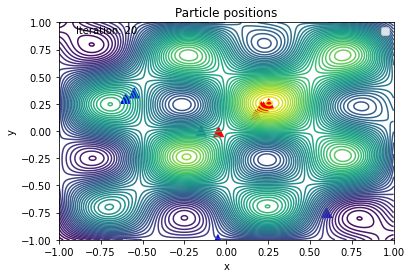

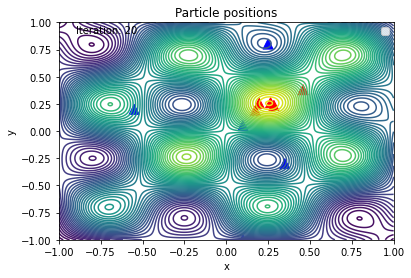

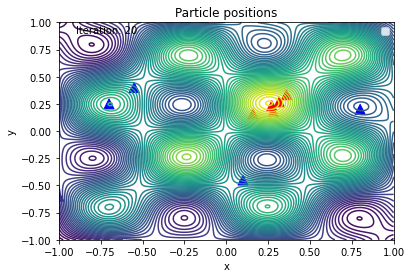

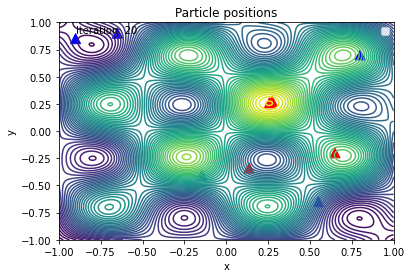

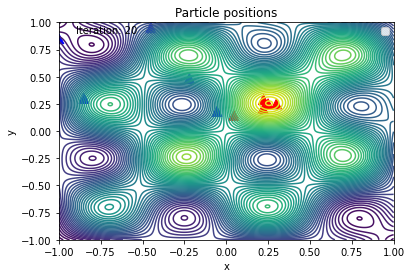

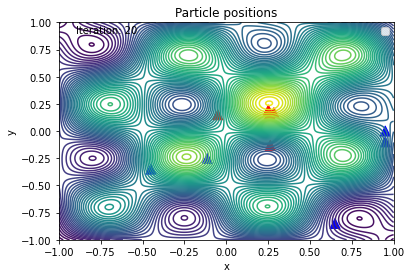

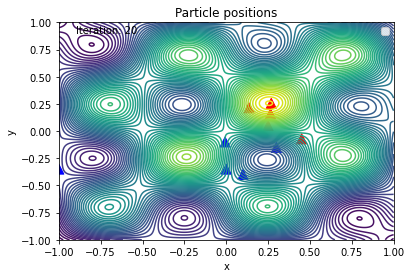

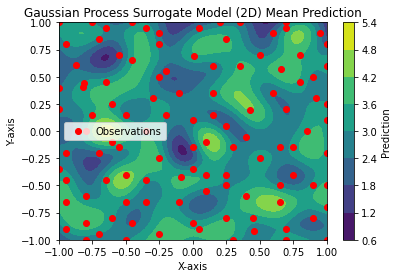

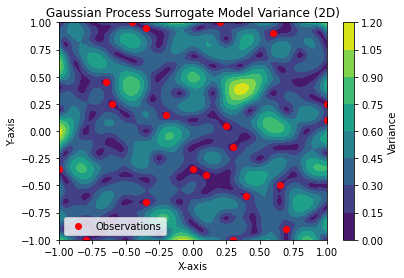

In [4]:
all_symbols = ["-", "--", "-.", ":"]
all_colors = ["r", "g", "b", "k"]

symbol_list = []
color_list = []
label_list = []
gbest_values = []
for i, experiment in enumerate(experiments):
    env, agent_policy, name, timesteps, iters, save_gif, result_path = experiment
    gbest_value = run_experiment(env, agent_policy, timesteps, iters, save_gif, f"{result_path}{name}/")
    env.surrogate.plot_surrogate(save_dir=f"{result_path}{name}/surrogate.png")
    env.surrogate.plot_variance(save_dir=f"{result_path}{name}/variance.png")
    np.save(result_path + name + "_gbest_values.npy", gbest_values)
    gbest_values.append(gbest_value)
    symbol_list.append(all_symbols[i])
    color_list.append(all_colors[i])
    label_list.append(name)

In [5]:
plot_num_function_evaluation(fopt=np.array(gbest_values), label_list=label_list, symbol_list=symbol_list, color_list=color_list, save_dir=f"experiment/comparison_{exp_num}.png",
                             n_agents=env.n_agents, opt_value=env.objective_function.optimal_value(env.n_dim))

Number of function evaluations: 10
Number of algorithms: 2
